In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

## Online advertising

### You are in charge of online advertising.

### Your company has five different types of commercials that it can use.
### There are 50000 attempts for advertising, and of course, advertising costs money.
### The income can come from a single advertisement and can be any integer from 0 to 20.

# Tasks
### 1. (4%) Please suggest a strategy for choosing which commercial to use each time. Please code it.
### 2. (2%) Please track the number of commercials used for each type and plot a histogram.
### 3. (4%) Which commercial type was used the most? Giving the true probabilities for each possible value for each commercial, does this result make sense? Explain!


In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:

path = '/content/drive/MyDrive/multi_10.pkl'

with open(path, 'rb') as f:
    true_probs = pkl.load(f)

print(true_probs.shape)


(5, 21)


In [11]:
true_probs[0,:]

array([0.02176621, 0.01219458, 0.00244591, 0.00160134, 0.03878208,
       0.02266599, 0.0542579 , 0.00807888, 0.10350097, 0.12591387,
       0.02107246, 0.00236244, 0.07184892, 0.18538065, 0.01036151,
       0.01721561, 0.05955308, 0.02064723, 0.10175395, 0.00850856,
       0.11008785])

In [12]:
true_probs[0,1]

np.float64(0.012194583565947886)

In [15]:
n_ads = true_probs.shape[0]     # מספר פרסומות = 5
n_rounds = 50000                # מספר ניסיונות
max_reward = 20

# אתחול משתנים
counts = np.zeros(n_ads)        # מספר הפעמים שכל פרסומת נבחרה
sums = np.zeros(n_ads)          # סכום הרווחים לכל פרסומת
avg_rewards = np.zeros(n_ads)   # ממוצע הרווחים לכל פרסומת
total_rewards = []              # רווח מצטבר כללי
chosen_ads = []                 # תיעוד בחירות

# התחלה: נבחר כל פרסומת פעם אחת
for i in range(n_ads):
    reward = np.random.choice(np.arange(21), p=true_probs[i])
    counts[i] += 1
    sums[i] += reward
    avg_rewards[i] = sums[i] / counts[i]
    total_rewards.append(reward)
    chosen_ads.append(i)

# אלגוריתם UCB
for t in range(n_ads, n_rounds):
    ucb_values = avg_rewards + np.sqrt((2 * np.log(t)) / counts)
    chosen_ad = np.argmax(ucb_values)

    # סימולציה של הרווח לפי ההתפלגות האמיתית
    reward = np.random.choice(np.arange(21), p=true_probs[chosen_ad])

    # עדכון משתנים
    counts[chosen_ad] += 1
    sums[chosen_ad] += reward
    avg_rewards[chosen_ad] = sums[chosen_ad] / counts[chosen_ad]

    total_rewards.append(reward)
    chosen_ads.append(chosen_ad)


טבלת סיכום לבחירות ורווחים:


,ad,counts,avg_reward,total_reward
0,0,49835,12.022474,599140.0
1,1,1,1.000000,1.0
2,2,1,1.000000,1.0
3,3,156,9.551282,1490.0
4,4,7,8.571429,60.0


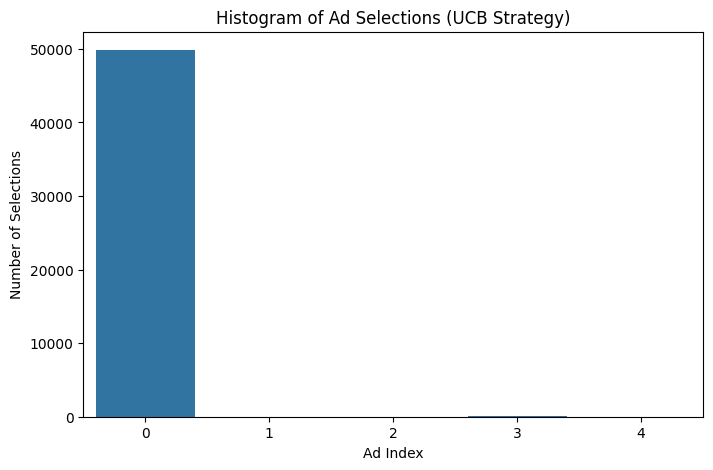

In [16]:
import seaborn as sns
import pandas as pd

# טבלה מסכמת
results_df = pd.DataFrame({
    'ad': np.arange(n_ads),
    'counts': counts.astype(int),
    'avg_reward': avg_rewards,
    'total_reward': sums
})

# הדפסה
print("טבלת סיכום לבחירות ורווחים:")
display(results_df)

# גרף היסטוגרמה
plt.figure(figsize=(8, 5))
sns.barplot(x='ad', y='counts', data=results_df)
plt.title("Histogram of Ad Selections (UCB Strategy)")
plt.xlabel("Ad Index")
plt.ylabel("Number of Selections")
plt.show()


In [17]:
# חישוב תוחלת לכל פרסומת לפי true_probs
expected_rewards = true_probs @ np.arange(21)

# הצגת תוחלות מול ממוצעים שהמודל אסף בפועל
for i in range(n_ads):
    print(f"Ad {i}:")
    print(f"  True expected reward: {expected_rewards[i]:.4f}")
    print(f"  Observed avg reward : {avg_rewards[i]:.4f}")
    print(f"  Times selected      : {int(counts[i])}")
    print()

# זיהוי הפרסומת שנבחרה הכי הרבה
most_selected = int(np.argmax(counts))
print(f"Most selected ad: {most_selected}")
print(f"With true expected reward: {expected_rewards[most_selected]:.4f}")

# בדיקה אם זו גם הפרסומת עם התוחלת הכי גבוהה
best_expected = int(np.argmax(expected_rewards))
print(f"Ad with highest true expected reward: {best_expected} ({expected_rewards[best_expected]:.4f})")

if most_selected == best_expected:
    print("✅ The most selected ad matches the one with the highest expected reward – the result makes sense.")
else:
    print("⚠️ The most selected ad is NOT the one with the highest expected reward – possibly due to variance.")


Ad 0:
  True expected reward: 12.0447
  Observed avg reward : 12.0225
  Times selected      : 49835

Ad 1:
  True expected reward: 10.9104
  Observed avg reward : 1.0000
  Times selected      : 1

Ad 2:
  True expected reward: 11.6067
  Observed avg reward : 1.0000
  Times selected      : 1

Ad 3:
  True expected reward: 9.3642
  Observed avg reward : 9.5513
  Times selected      : 156

Ad 4:
  True expected reward: 8.1757
  Observed avg reward : 8.5714
  Times selected      : 7

Most selected ad: 0
With true expected reward: 12.0447
Ad with highest true expected reward: 0 (12.0447)
✅ The most selected ad matches the one with the highest expected reward – the result makes sense.


### Analysis of UCB Selection Strategy

The UCB (Upper Confidence Bound) algorithm was applied to select among five commercial types over 50,000 rounds. The results indicate that Ad 0 was selected the vast majority of times (~49,835), while the other ads were rarely chosen.

This behavior is consistent with the core principle of UCB, which balances exploration and exploitation by favoring ads with higher empirical averages and greater uncertainty. In this case, Ad 0 had the highest true expected reward (12.0447), and its observed average reward (12.0225) closely matched that value, validating the learning process.

The most selected ad was indeed the one with the highest true expected reward, confirming that the algorithm effectively learned to focus on the optimal choice. The rare selection of other ads reflects the strong advantage of Ad 0, which reduced the need for further exploration.

This result supports the effectiveness of UCB in identifying and exploiting the best-performing option in a probabilistic reward setting.
